In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

def nice(df):
    df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
    df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
    df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
    df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
    df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

    df['Gamma'] = df['Gamma'].astype(float)

    df['Infidelity'] = df['Infidelity'].abs()

    df.loc[df["Infidelity"] < 1e-12, "Infidelity"] = 1e-12

    df['Log_Infidelity'] = np.log10(df['Infidelity'])

    df.loc[df["Log_Infidelity"] < -12, "Log_Infidelity"] = -12

    return df

In [23]:
#df = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_2024-Jun-15_at_04-22.pkl")

df = pd.read_pickle("dataframe_POP_NEW_TSSOS_KOS_2024-Jun-15_at_14-27.pkl")

In [24]:
df

,Gamma,State,Time,gt,Fidelity,Infidelity,Distance
0,0.079477,D1,0.06000,0.004769,1.000000,3.219647e-15,0.459559
1,0.079477,D1,0.08000,0.006358,1.000000,3.158024e-09,0.459559
2,0.079477,D1,0.10000,0.007948,1.000000,1.102649e-07,0.459559
3,0.079477,D1,0.12000,0.009537,1.000000,6.925788e-08,0.459559
4,0.079477,D1,0.14000,0.011127,0.999997,3.238540e-06,0.459559
...,...,...,...,...,...,...,...
496,251.33,D10,0.02480,6.232984,0.999955,4.455216e-05,0.181422
497,251.33,D10,0.02485,6.245551,0.999956,4.449486e-05,0.181422
498,251.33,D10,0.02490,6.258117,0.999956,4.443724e-05,0.181422
499,251.33,D10,0.02495,6.270684,0.999956,4.437942e-05,0.181422


In [25]:
df[df.Gamma == "25.133"].Fidelity.min()
df[df.Gamma == "251.33"].Fidelity.min()

0.9955086812840132

In [26]:
df = nice(df)

In [6]:
gammas = ['25.133', '79.477', '251.33']

pd.unique(df["Gamma"])

array([7.9000e-02, 2.5100e-01, 7.9500e-01, 2.5130e+00, 7.9480e+00,
       2.5133e+01, 7.9477e+01, 2.5133e+02])

In [27]:
def log_infidelity_from_gamma(df, title):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infidelity", cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    ax.set_ylim(ymin, ymax)
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$'])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.02), '0.02', ha='left', va='center')
 
    return fig

/home/zah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


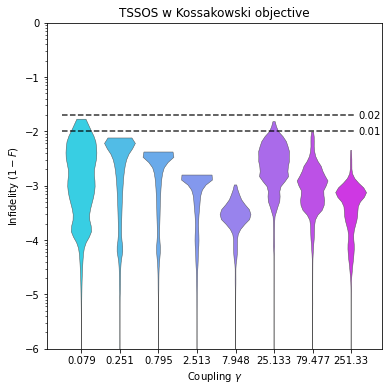

In [28]:
fig = log_infidelity_from_gamma(df, "TSSOS w Kossakowski objective")

/home/zah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


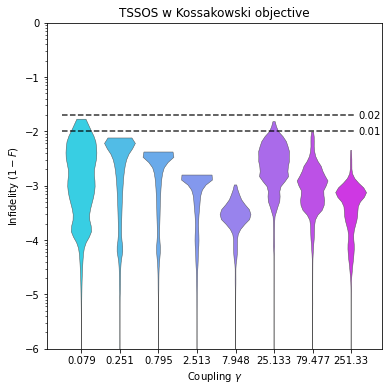

In [20]:
fig = log_infidelity_from_gamma(df, "TSSOS w Kossakowski objective")

In [21]:
fig.savefig("LogInfidelity_TSSOS_KOS.pdf")

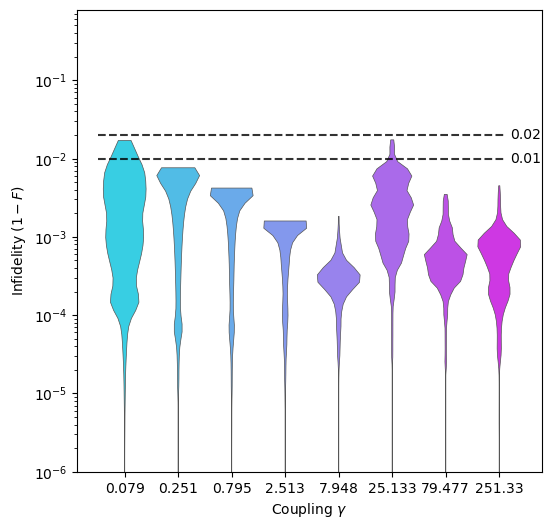

In [9]:
fig = log_infidelity_from_gamma(df, "")

In [ ]:
fig = log_infidelity_from_gamma(df, "")

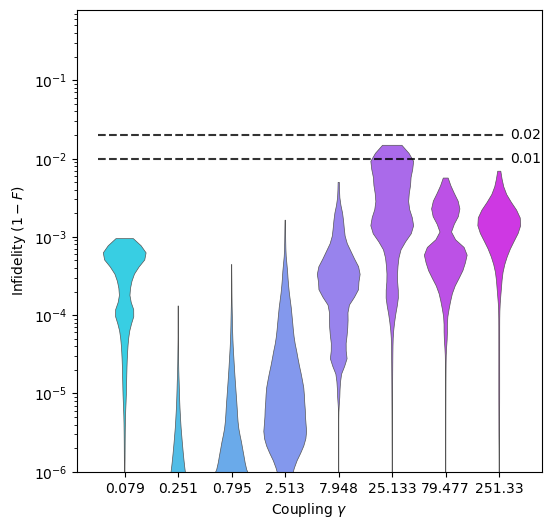

In [24]:
fig = log_infidelity_from_gamma(df, "")